<a href="https://colab.research.google.com/github/Ameer-Mohammed/test2/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Ameer-Mohammed/test2/main/Date_Fruit_Datasets_Pca.csv')
df.head(n=25)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0
5,408953,2326.6931,840.1821,622.0076,0.6722,721.5921,0.9974,410036,0
6,451414,2457.2080,889.3253,652.4316,0.6796,758.1281,0.9970,452755,0
7,382636,2275.7791,808.0833,609.2819,0.6569,697.9880,0.9931,385277,0
8,546063,2714.9480,916.3737,766.4536,0.5481,833.8279,0.9882,552598,0
9,420044,2391.1230,836.9280,645.1822,0.6370,731.3116,0.9918,423531,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AREA          898 non-null    int64  
 1   PERIMETER     898 non-null    float64
 2   MAJOR_AXIS    898 non-null    float64
 3   MINOR_AXIS    898 non-null    float64
 4   ECCENTRICITY  898 non-null    float64
 5   EQDIASQ       898 non-null    float64
 6   SOLIDITY      898 non-null    float64
 7   CONVEX_AREA   898 non-null    int64  
 8   Class         898 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 63.3 KB


# Classes

In [5]:
y = df['Class']
target = df['Class'].to_numpy()

# Features
Data Matrix

In [6]:
X = df.iloc[:,0:6]
X.head(10)

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291
5,408953,2326.6931,840.1821,622.0076,0.6722,721.5921
6,451414,2457.2080,889.3253,652.4316,0.6796,758.1281
7,382636,2275.7791,808.0833,609.2819,0.6569,697.9880
8,546063,2714.9480,916.3737,766.4536,0.5481,833.8279
9,420044,2391.1230,836.9280,645.1822,0.6370,731.3116


In [7]:

X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AREA,898.0,298295.207127,107245.205337,1987.0000,206948.000000,319833.00000,382573.000000,546063.0000
PERIMETER,898.0,2057.660953,410.012459,911.8280,1726.091500,2196.34545,2389.716575,2811.9971
MAJOR_AXIS,898.0,750.811994,144.059326,336.7227,641.068650,791.36340,858.633750,1222.7230
MINOR_AXIS,898.0,495.872785,114.268917,2.2832,404.684375,495.05485,589.031700,766.4536
ECCENTRICITY,898.0,0.737468,0.088727,0.3448,0.685625,0.75470,0.802150,1.0000
EQDIASQ,898.0,604.577938,119.593888,50.2984,513.317075,638.14095,697.930525,833.8279


Standardize the data

In [8]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AREA,898.0,2.215501e-16,1.000557,-2.764444,-0.852235,0.200939,0.786280,2.311580
PERIMETER,898.0,3.165001e-17,1.000557,-2.796187,-0.809132,0.338433,0.810318,1.840814
MAJOR_AXIS,898.0,5.697002e-16,1.000557,-2.876038,-0.762217,0.281648,0.748871,3.277636
MINOR_AXIS,898.0,-1.582501e-17,1.000557,-4.321951,-0.798461,-0.007162,0.815715,2.369250
ECCENTRICITY,898.0,-3.798001e-16,1.000557,-4.428020,-0.584619,0.194323,0.729405,2.960512
EQDIASQ,898.0,-1.899001e-16,1.000557,-4.637264,-0.763515,0.280798,0.781015,1.917972


#Observations and variables

In [9]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

# Data Visualisation


Class Distribution


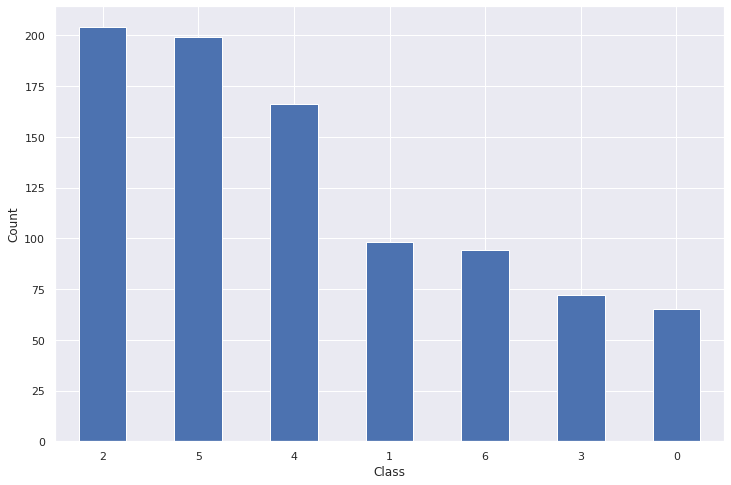

In [10]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Box & Whisker Plots


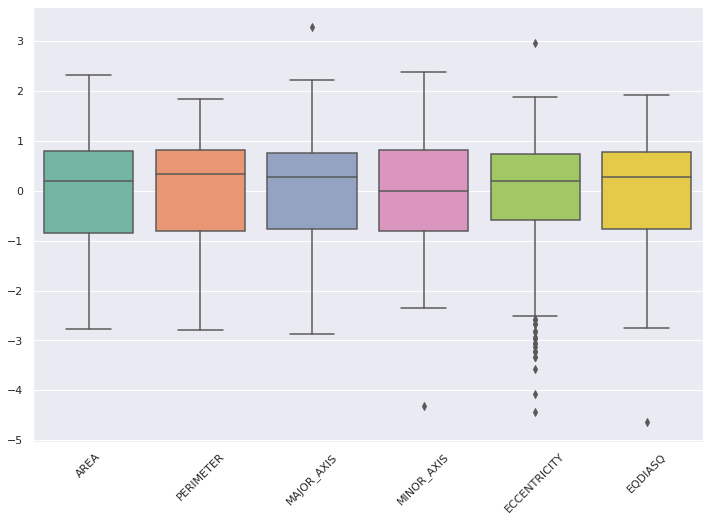

In [11]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


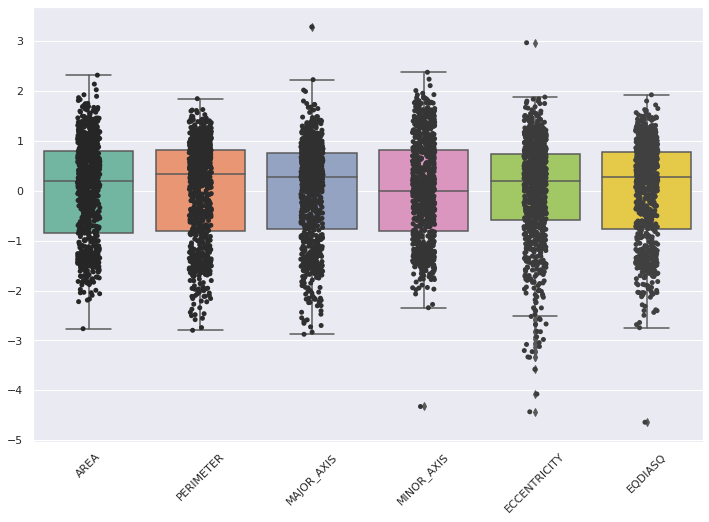

In [12]:
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

# Five Number Summary


In [13]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ
count,8.980000e+02,8.980000e+02,8.980000e+02,8.980000e+02,8.980000e+02,8.980000e+02
mean,2.215501e-16,3.165001e-17,5.697002e-16,-1.582501e-17,-3.798001e-16,-1.899001e-16
std,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00,1.000557e+00
min,-2.764444e+00,-2.796187e+00,-2.876038e+00,-4.321951e+00,-4.428020e+00,-4.637264e+00
25%,-8.522349e-01,-8.091321e-01,-7.622172e-01,-7.984606e-01,-5.846189e-01,-7.635149e-01
50%,2.009395e-01,3.384331e-01,2.816479e-01,-7.161974e-03,1.943232e-01,2.807979e-01
75%,7.862800e-01,8.103185e-01,7.488709e-01,8.157146e-01,7.294053e-01,7.810149e-01
max,2.311580e+00,1.840814e+00,3.277636e+00,2.369250e+00,2.960512e+00,1.917972e+00


# Pair Plot


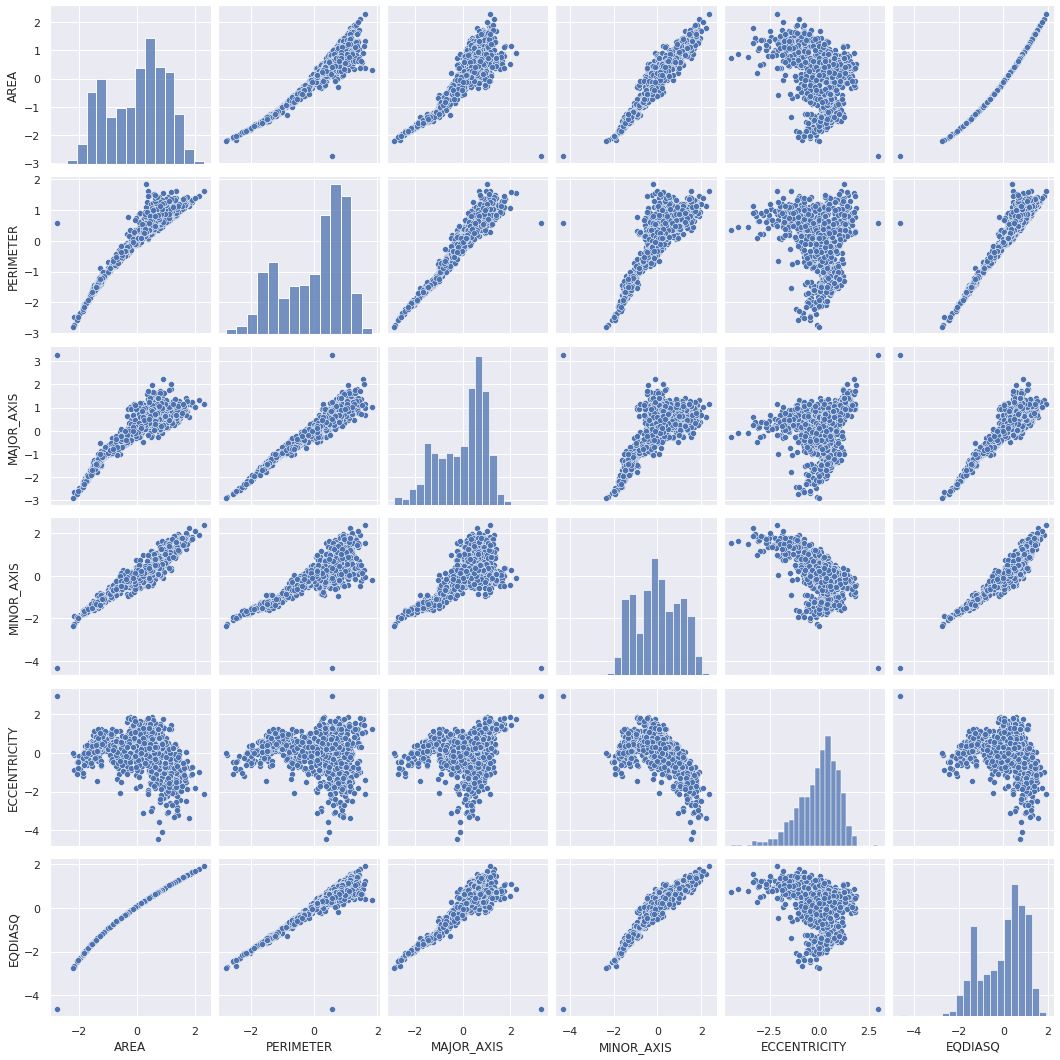

In [14]:
sns.pairplot(df)

# Covariance

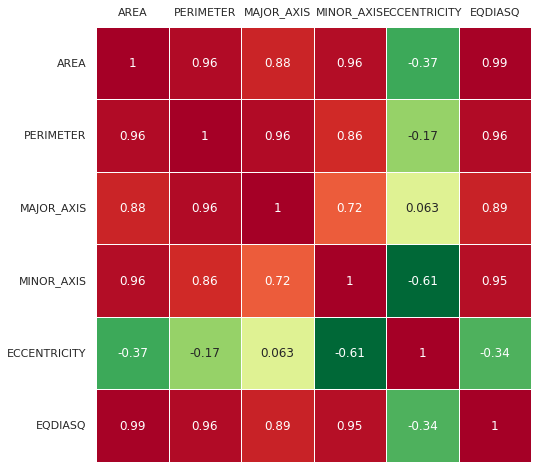

In [15]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')

# Principal Component Analysis (PCA)

Text(0, 0.5, '$Z_2$')

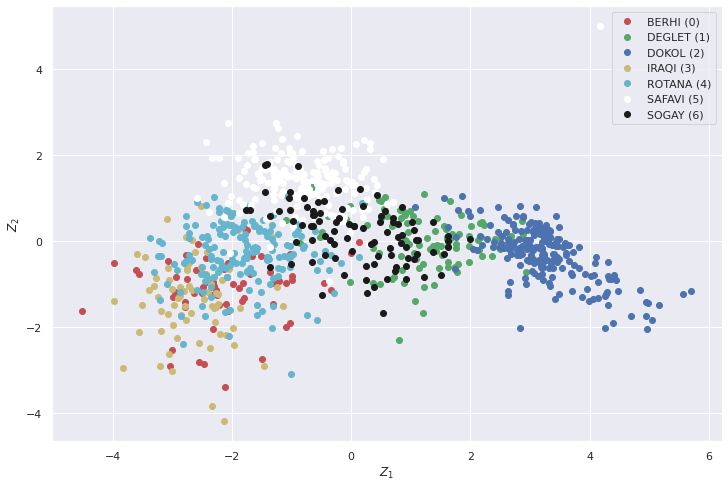

In [16]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

idx_BERHI = np.where(y == 0)
idx_DEGLET = np.where(y == 1)
idx_DOKOL = np.where(y == 2)
idx_IRAQI = np.where(y == 3)
idx_ROTANA = np.where(y == 4)
idx_SAFAVI = np.where(y == 5)
idx_SOGAY = np.where(y == 6)


plt. figure()

plt.scatter(Z[idx_BERHI,0], Z[idx_BERHI,1], c='r', label='BERHI (0)')
plt.scatter(Z[idx_DEGLET,0], Z[idx_DEGLET,1], c='g', label='DEGLET (1)')
plt.scatter(Z[idx_DOKOL,0], Z[idx_DOKOL,1], c='b', label='DOKOL (2)')
plt.scatter(Z[idx_IRAQI,0], Z[idx_IRAQI,1], c='y', label='IRAQI (3)')
plt.scatter(Z[idx_ROTANA,0], Z[idx_ROTANA,1], c='c', label='ROTANA (4)')
plt.scatter(Z[idx_SAFAVI,0], Z[idx_SAFAVI,1], c='w', label='SAFAVI (5)')
plt.scatter(Z[idx_SOGAY,0], Z[idx_SOGAY,1], c='k', label='SOGAY (6)')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

# Eigenvectors

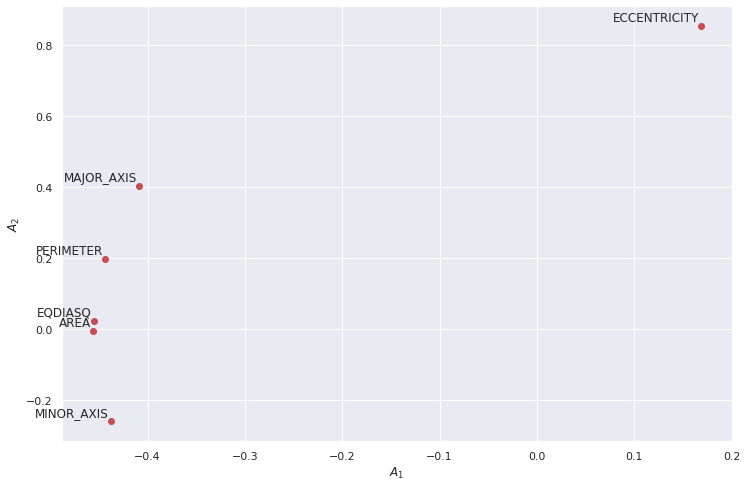

In [17]:
A = pca.components_.T 
#print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


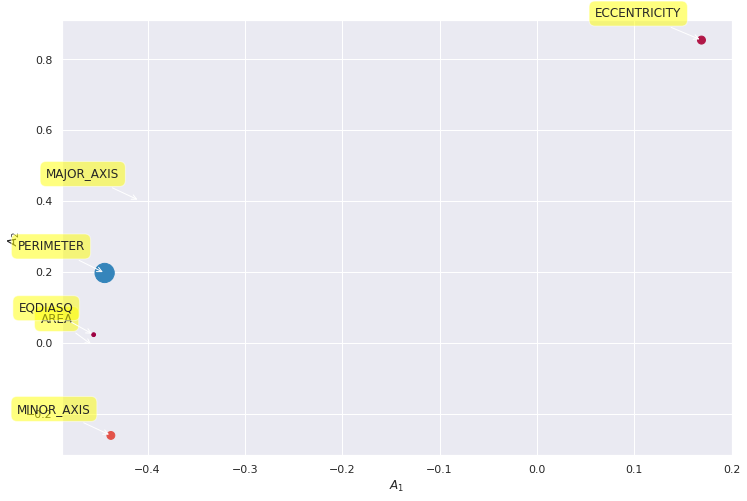

In [18]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# Scree plot

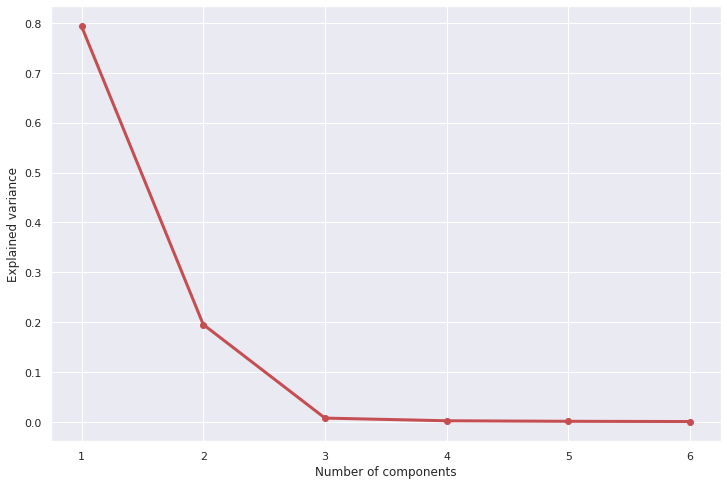

In [19]:
#Eigenvalues
Lambda = pca.explained_variance_ 
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

# Explained Variance


Text(0, 0.5, 'Cumulative explained variance')

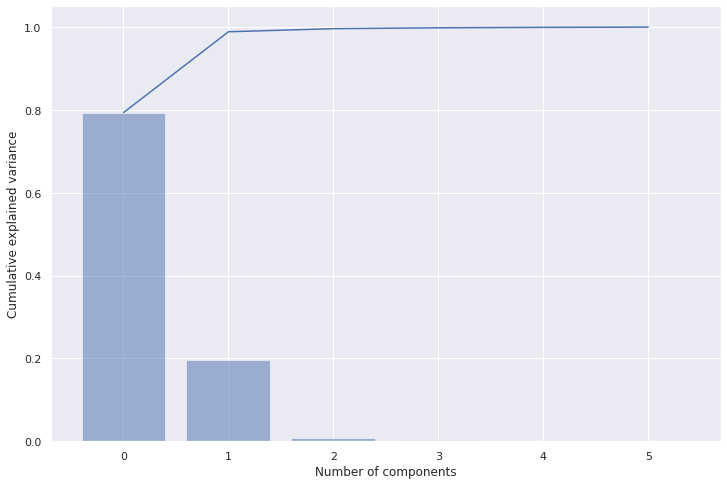

In [20]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

# Explained Variance per PC


In [21]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (79.4%)',
 '1': 'PC 2 (19.5%)',
 '2': 'PC 3 (0.7%)',
 '3': 'PC 4 (0.2%)',
 '4': 'PC 5 (0.1%)',
 '5': 'PC 6 (0.1%)'}

# Biplot

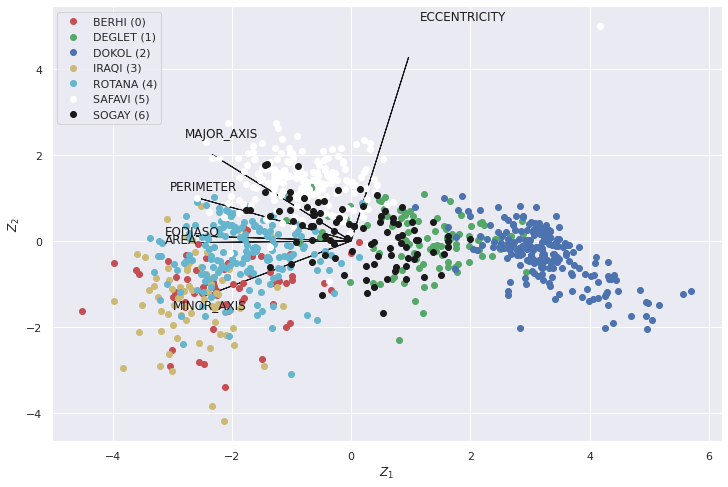

In [25]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_BERHI,0], Z[idx_BERHI,1], c='r', label='BERHI (0)')
plt.scatter(Z[idx_DEGLET,0], Z[idx_DEGLET,1], c='g', label='DEGLET (1)')
plt.scatter(Z[idx_DOKOL,0], Z[idx_DOKOL,1], c='b', label='DOKOL (2)')
plt.scatter(Z[idx_IRAQI,0], Z[idx_IRAQI,1], c='y', label='IRAQI (3)')
plt.scatter(Z[idx_ROTANA,0], Z[idx_ROTANA,1], c='c', label='ROTANA (4)')
plt.scatter(Z[idx_SAFAVI,0], Z[idx_SAFAVI,1], c='w', label='SAFAVI (5)')
plt.scatter(Z[idx_SOGAY,0], Z[idx_SOGAY,1], c='k', label='SOGAY (6)')
plt.legend(loc='upper left')

#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

# Using PCA Librarry


In [26]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=037730d97cc0e93625b100069277bac1feb4b4afa5a798d19f65e7dea32e087f
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [27]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [28]:
print(out['topfeat'])

    PC       feature   loading  type
0  PC1          AREA -0.456378  best
1  PC2  ECCENTRICITY  0.854740  best
2  PC1     PERIMETER -0.444154  weak
3  PC1    MAJOR_AXIS -0.408453  weak
4  PC1    MINOR_AXIS -0.437746  weak
5  PC1       EQDIASQ -0.455448  weak


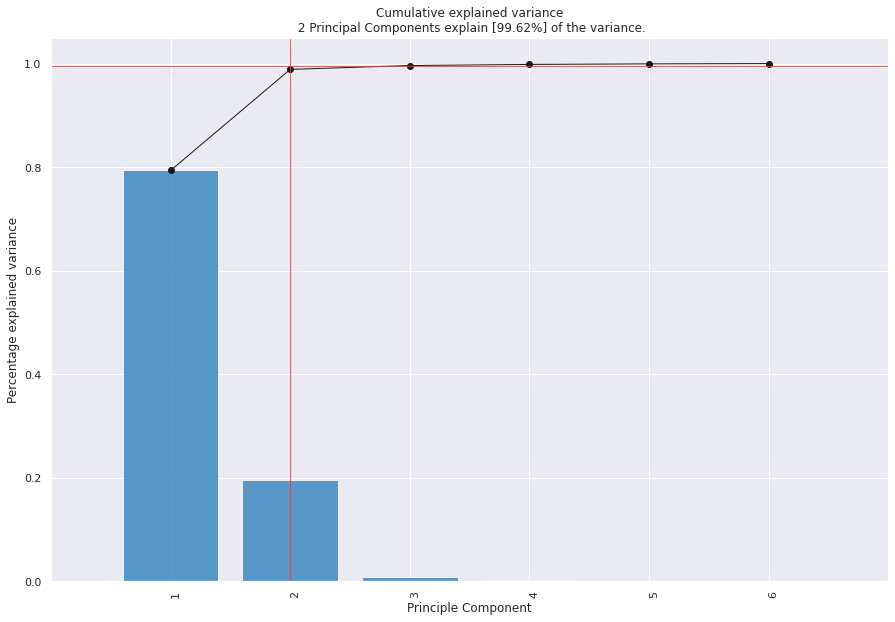

<Figure size 864x576 with 0 Axes>

In [29]:
model.plot();

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [898] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [898] unique colors! Available unique colors: [9].


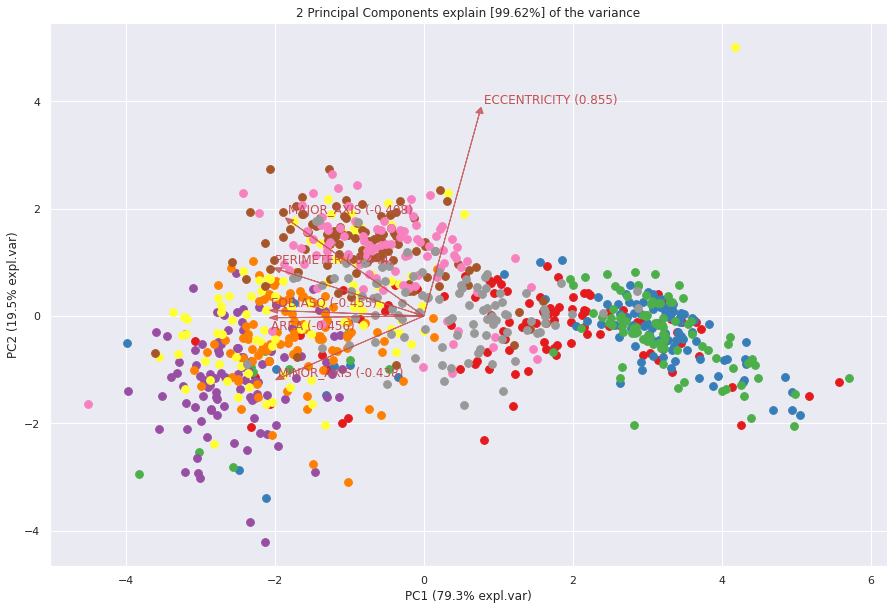

In [30]:
 ax = model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [898] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [898] unique colors! Available unique colors: [9].


(<Figure size 1080x720 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [99.62%] of the variance'}, xlabel='PC1 (79.3% expl.var)', ylabel='PC2 (19.5% expl.var)'>)

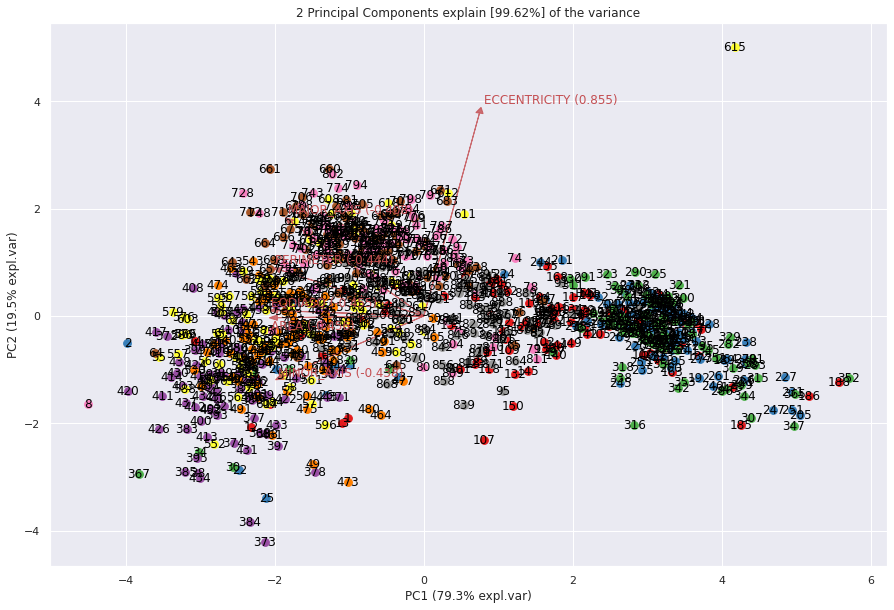

In [31]:
model.biplot(legend=False, hotellingt2=True)


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 1080x720 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [99.62%] of the variance'}, xlabel='PC1 (79.3% expl.var)', ylabel='PC2 (19.5% expl.var)'>)

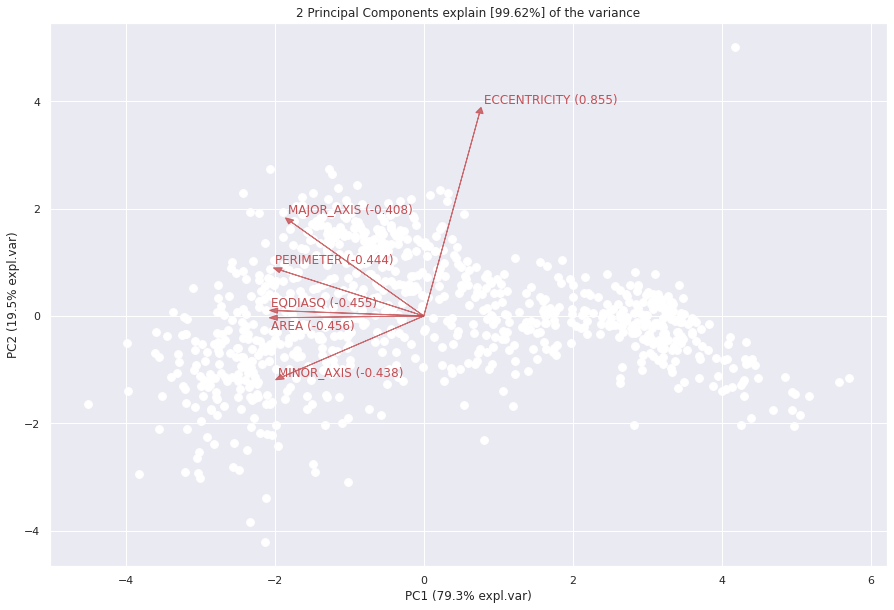

In [32]:
model.biplot(cmap=None, label=False, legend=False)

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [898] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [898] unique colors! Available unique colors: [9].


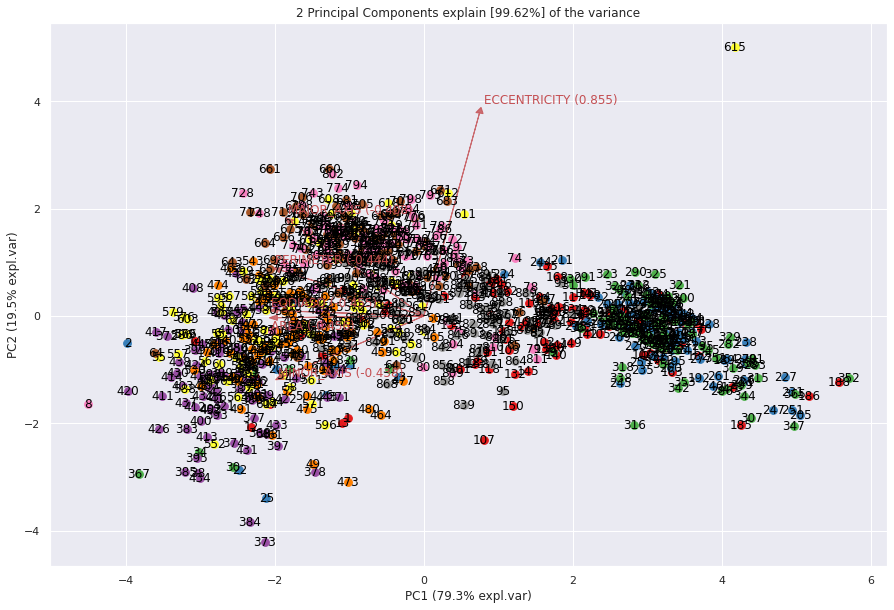

In [34]:
ax = model.biplot(legend=False)

# Principal components

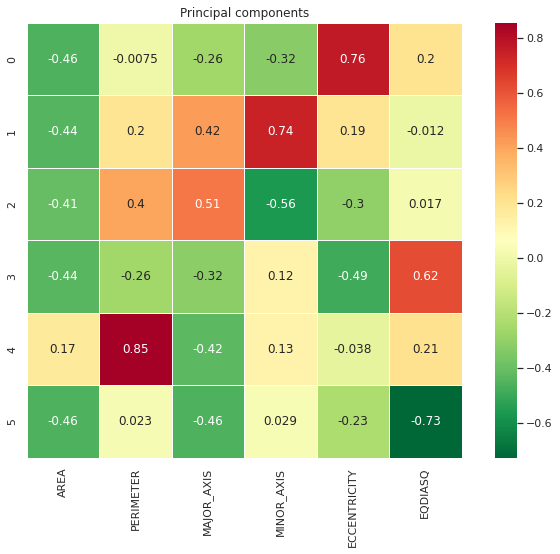

PC1:[-0.45637815 -0.44415448 -0.40845283 -0.4377455   0.16899134 -0.45544799]
PC2:[-0.00749124  0.19726081  0.40197222 -0.26141628  0.85474024  0.02304408]


In [36]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
#ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

# Hotelling's T2 test

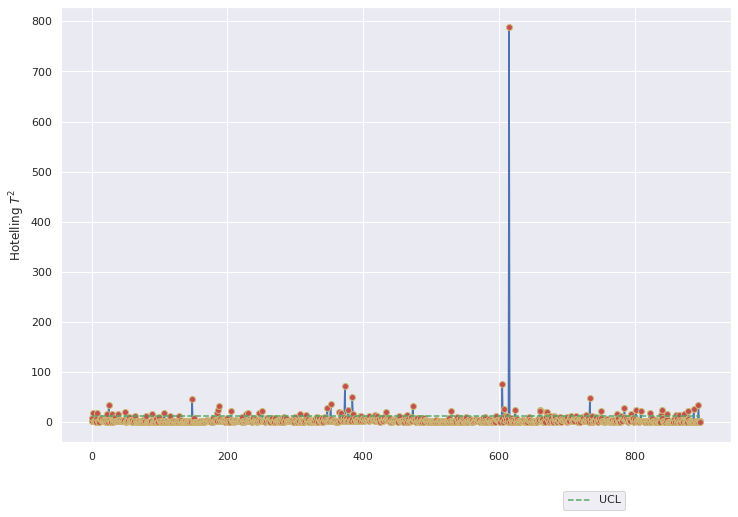

In [38]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [39]:
print(np.argwhere(Tsquare>UCL))

[[  2]
 [  8]
 [ 22]
 [ 25]
 [ 30]
 [ 38]
 [ 49]
 [ 80]
 [ 89]
 [107]
 [116]
 [128]
 [148]
 [185]
 [186]
 [188]
 [205]
 [227]
 [231]
 [247]
 [251]
 [307]
 [316]
 [347]
 [352]
 [365]
 [367]
 [373]
 [378]
 [384]
 [385]
 [408]
 [417]
 [434]
 [464]
 [473]
 [530]
 [596]
 [605]
 [608]
 [609]
 [612]
 [615]
 [624]
 [660]
 [661]
 [669]
 [671]
 [728]
 [734]
 [750]
 [774]
 [785]
 [794]
 [795]
 [802]
 [809]
 [822]
 [839]
 [841]
 [848]
 [861]
 [865]
 [873]
 [878]
 [887]
 [894]]


# Control Charts for Principal Components


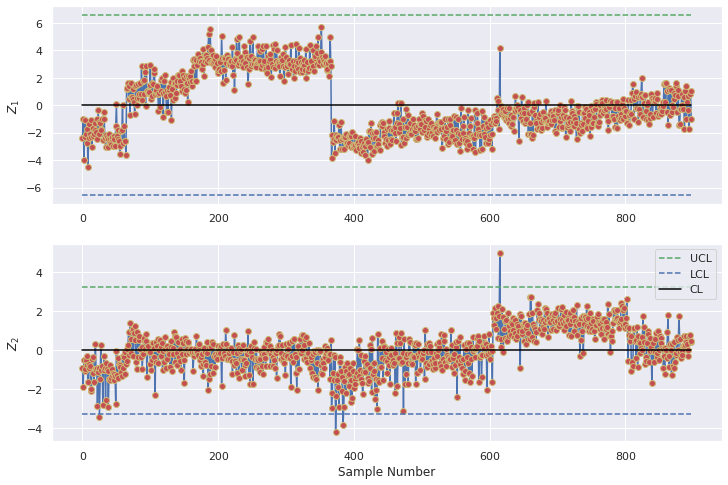

In [41]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

# Out of Control Points

In [42]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[]
[[ 25]
 [373]
 [384]]
[[615]]


# Multi-Class Classification


In [49]:
# Test-Train Split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

TypeError: ignored